# Classification Project Model Analysis

**Objective:** Build and compare various machine learning models to predict student grades.
We will follow a structured approach: Data Prep, Preprocessing, and Model Evaluation.

## Task 1: Data Preparation and Exploration

1. Import necessary libraries.
2. Load the dataset.
3. Check for missing values and understand data statistics.

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [118]:
# Load Data
df = pd.read_csv('Exam_Score_Prediction.csv')

print("Shape of dataset:", df.shape)
print("First 5 rows:")
print(df.head())

# Check for null values
print("\nNull Values:")
print(df.isnull().sum())

# Statistical Summary
print("\nStatistical Summary:")
print(df.describe())

Shape of dataset: (20000, 13)
First 5 rows:
   student_id  age  gender   course  study_hours  class_attendance  \
0           1   17    male  diploma         2.78              92.9   
1           2   23   other      bca         3.37              64.8   
2           3   22    male     b.sc         7.88              76.8   
3           4   20   other  diploma         0.67              48.4   
4           5   20  female  diploma         0.89              71.6   

  internet_access  sleep_hours sleep_quality   study_method facility_rating  \
0             yes          7.4          poor       coaching             low   
1             yes          4.6       average  online videos          medium   
2             yes          8.5          poor       coaching            high   
3             yes          5.8       average  online videos             low   
4             yes          9.8          poor       coaching             low   

  exam_difficulty  exam_score  
0            hard        58.

## Task 2: Data Preprocessing

1. Create the target variable (Grade).
2. Clean the data (Drop ID/Score).
3. Encode categorical variables.
4. Scale features.
5. Split into Training and Testing sets.

In [119]:
# Create Target Variable
def get_grade(score):
    if score >= 75:
        return 'Distinction'
    elif score >= 60:
        return 'Pass'
    else:
        return 'Fail'

df['Grade'] = df['exam_score'].apply(get_grade)
print("Grade Distribution:\n", df['Grade'].value_counts())

# Clean Data
df_clean = df.drop(columns=['student_id', 'exam_score'])


Grade Distribution:
 Grade
Fail           8953
Pass           5594
Distinction    5453
Name: count, dtype: int64


In [120]:
# Encoding
cat_cols = df_clean.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in cat_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

# Split X and y
X = df_clean.drop('Grade', axis=1)
y = df_clean['Grade']

# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split


## Task 3: Model Training and Evaluation

We will train multiple models and interpret their performance using Accuracy and Confusion Matrices.

In [121]:
results = {}

def evaluate_model(model, name, X_tr, y_tr, X_te, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    results[name] = acc
    
    print(f"--- {name} Results ---")
    print(f"Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_te, y_pred))
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_te, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### 3.1 K-Nearest Neighbors (KNN)

In [122]:
# Train-Test Split for K-Nearest Neighbors (KNN)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("K-Nearest Neighbors (KNN) Train Shape:", X_train.shape)
print("K-Nearest Neighbors (KNN) Test Shape:", X_test.shape)

K-Nearest Neighbors (KNN) Train Shape: (16000, 11)
K-Nearest Neighbors (KNN) Test Shape: (4000, 11)


--- KNN Results ---
Accuracy: 0.6132

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.68      0.62      1070
           1       0.72      0.80      0.76      1812
           2       0.37      0.24      0.29      1118

    accuracy                           0.61      4000
   macro avg       0.56      0.57      0.56      4000
weighted avg       0.59      0.61      0.59      4000



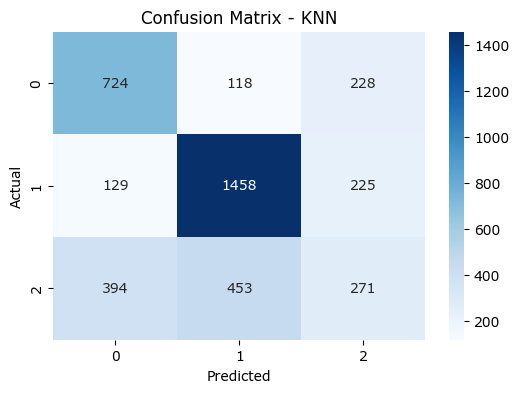

In [123]:
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, 'KNN', X_train, y_train, X_test, y_test)

### 3.2 Multinomial Naive Bayes

In [124]:
# Train-Test Split for Multinomial Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Multinomial Naive Bayes Train Shape:", X_train.shape)
print("Multinomial Naive Bayes Test Shape:", X_test.shape)

Multinomial Naive Bayes Train Shape: (16000, 11)
Multinomial Naive Bayes Test Shape: (4000, 11)


--- Multinomial NB Results ---
Accuracy: 0.5062

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.20      0.33      1070
           1       0.48      1.00      0.65      1812
           2       0.00      0.00      0.00      1118

    accuracy                           0.51      4000
   macro avg       0.44      0.40      0.33      4000
weighted avg       0.44      0.51      0.38      4000



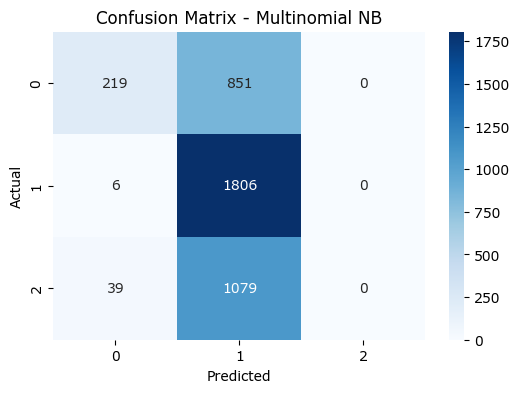

In [125]:
mnb = MultinomialNB()
evaluate_model(mnb, 'Multinomial NB', X_train, y_train, X_test, y_test)

### 3.3 Random Forest Classifier

In [126]:
# Train-Test Split for Random Forest Classifier
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Random Forest Classifier Train Shape:", X_train.shape)
print("Random Forest Classifier Test Shape:", X_test.shape)

Random Forest Classifier Train Shape: (16000, 11)
Random Forest Classifier Test Shape: (4000, 11)


--- Random Forest Results ---
Accuracy: 0.6980

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.72      0.71      1070
           1       0.79      0.85      0.82      1812
           2       0.51      0.42      0.46      1118

    accuracy                           0.70      4000
   macro avg       0.66      0.67      0.66      4000
weighted avg       0.69      0.70      0.69      4000



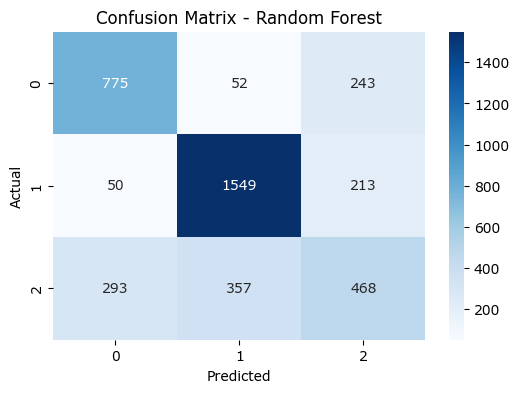

In [127]:
rf = RandomForestClassifier(random_state=42)
evaluate_model(rf, 'Random Forest', X_train, y_train, X_test, y_test)

### 3.4 Bagging Classifier

In [128]:
# Train-Test Split for Bagging Classifier
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Bagging Classifier Train Shape:", X_train.shape)
print("Bagging Classifier Test Shape:", X_test.shape)

Bagging Classifier Train Shape: (16000, 11)
Bagging Classifier Test Shape: (4000, 11)


--- Bagging Results ---
Accuracy: 0.6650

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68      1070
           1       0.77      0.82      0.79      1812
           2       0.46      0.38      0.42      1118

    accuracy                           0.67      4000
   macro avg       0.63      0.63      0.63      4000
weighted avg       0.65      0.67      0.66      4000



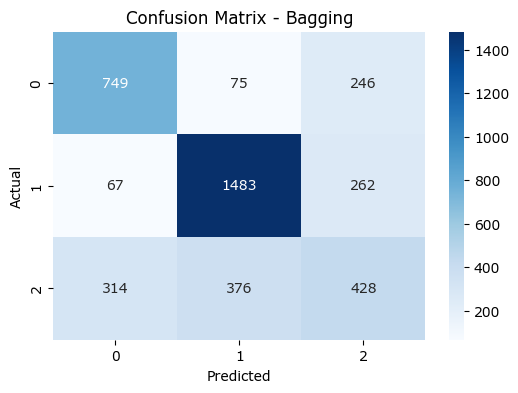

In [129]:
bagging = BaggingClassifier(random_state=42)
evaluate_model(bagging, 'Bagging', X_train, y_train, X_test, y_test)

### 3.5 Boosting (AdaBoost)

In [130]:
# Train-Test Split for Boosting (AdaBoost)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Boosting (AdaBoost) Train Shape:", X_train.shape)
print("Boosting (AdaBoost) Test Shape:", X_test.shape)

Boosting (AdaBoost) Train Shape: (16000, 11)
Boosting (AdaBoost) Test Shape: (4000, 11)


--- AdaBoost Results ---
Accuracy: 0.6887

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70      1070
           1       0.80      0.83      0.81      1812
           2       0.48      0.45      0.47      1118

    accuracy                           0.69      4000
   macro avg       0.66      0.66      0.66      4000
weighted avg       0.68      0.69      0.69      4000



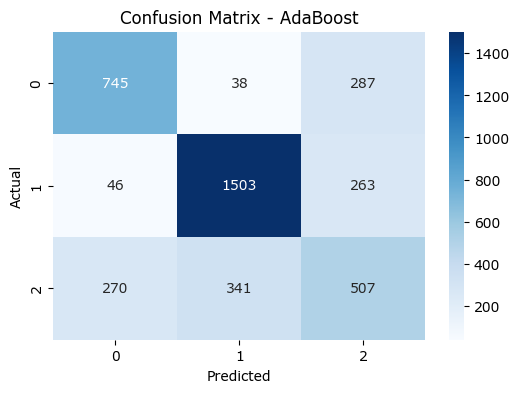

In [131]:
ada = AdaBoostClassifier(random_state=42)
evaluate_model(ada, 'AdaBoost', X_train, y_train, X_test, y_test)

### 3.6 Logistic Regression

In [132]:
# Train-Test Split for Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Logistic Regression Train Shape:", X_train.shape)
print("Logistic Regression Test Shape:", X_test.shape)

Logistic Regression Train Shape: (16000, 11)
Logistic Regression Test Shape: (4000, 11)


--- Logistic Regression Results ---
Accuracy: 0.6843

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70      1070
           1       0.79      0.84      0.81      1812
           2       0.47      0.41      0.44      1118

    accuracy                           0.68      4000
   macro avg       0.65      0.65      0.65      4000
weighted avg       0.67      0.68      0.68      4000



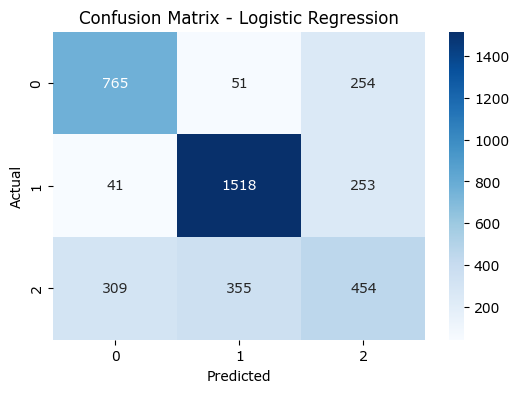

In [133]:
lr = LogisticRegression()
evaluate_model(lr, 'Logistic Regression', X_train, y_train, X_test, y_test)

### 3.7 Principal Component Analysis (PCA) Analysis

PCA Explained Variance Ratio:
 [0.13438938 0.11759077 0.11688767 0.11655539 0.09050955 0.08787532
 0.07779939 0.07454265 0.06263543 0.06081247 0.06040199]


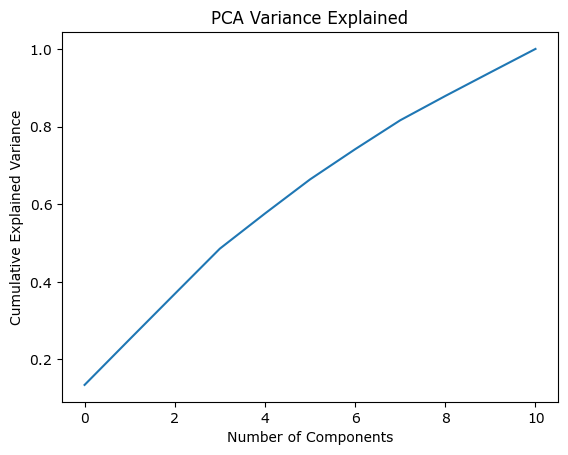

In [134]:
pca = PCA()
pca.fit(X_scaled)
print("PCA Explained Variance Ratio:\n", pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Explained')
plt.show()

### 3.6 Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train-Test Split for Decision Tree Classifier
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Decision Tree Classifier Train Shape:", X_train.shape)
print("Decision Tree Classifier Test Shape:", X_test.shape)

dt = DecisionTreeClassifier(random_state=42)
evaluate_model(dt, 'Decision Tree', X_train, y_train, X_test, y_test)

### 3.8 Model Comparison

                 Model  Accuracy
2        Random Forest   0.69800
4             AdaBoost   0.68875
5  Logistic Regression   0.68425
3              Bagging   0.66500
0                  KNN   0.61325
1       Multinomial NB   0.50625


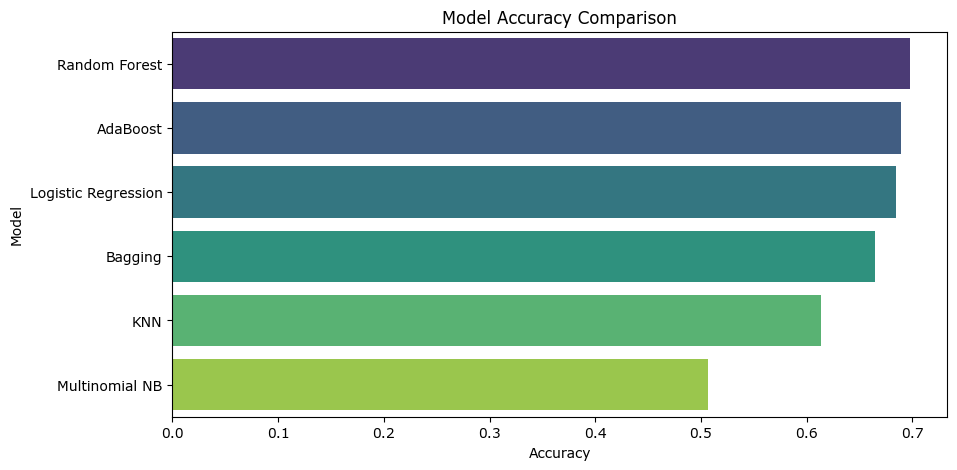

In [135]:
comparison_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False)
print(comparison_df)

plt.figure(figsize=(10, 5))
sns.barplot(x='Accuracy', y='Model', data=comparison_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.show()